# Evaluation: Precision & Recall

Using the evaluation metrics we have learned, we are going to compare how well some different types of classifiers perform on different evaluation metrics.

We are going to use a dataset of written numbers which we can import from sklearn. Run the code below to do so. 

In [28]:
# Libraries
from sklearn.datasets import fetch_openml
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn import metrics
from sklearn.metrics import roc_auc_score

In [2]:
# Load data
mnist = fetch_openml('mnist_784')
X, y = mnist['data'], mnist['target']

#### Now take a look at the shapes of the X and y matrices.

In [3]:
# your code here
X.shape

(70000, 784)

In [4]:
y.shape

(70000,)

#### Let's pick one entry and see what number is written. Use indexing to pick the 35th digit.

In [5]:
# your code here
X[35]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

####  Use the *reshape(28,28)* method and *plt.imshow()* function with the parameters *cmap = matplotlib.cm.binary* and *interpolation="nearest"* to make a plot of the number. Be sure to import matplotlib.

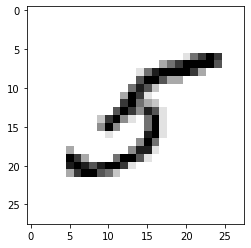

In [8]:
# your code here
plt.imshow(X[35].reshape((28,28)), cmap = plt.cm.binary, interpolation='nearest')
plt.show()

#### Use indexing to see if what the plot shows matches with the outcome of the 35th index.

In [9]:
# your code here
y[35]

'5'

#### Now lets break into a test train split to run a classification. Instead of using sklearn, use indexing to select the first 60000 entries for the training and the rest for testing.

In [10]:
# your code here
X_train = X[:60000]
y_train = y[:60000]
X_test = X[60000:]
y_test = y[60000:]

#### We are going to make a two-class classifier, so lets restrict to just one number, for example 5s. Do this by defining a new y training and y testing sets for just the number 5.

In [11]:
# your code here
y_train_5 = np.where(y_train== '5',1, 0)
y_test_5 = np.where(y_test == '5', 1, 0)

#### Lets train a logistic regression to predict if a number is a 5 or not. Remember to use the 'just 5s' target train array.

In [14]:
# your code here
model_5 = LogisticRegression().fit(X_train, y_train_5)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


#### Does the classifier predict correctly the 35th digit we picked before?

In [15]:
# your code here
y_pred = model_5.predict(X_train)
print(y_pred[35])
print(y[35])

1
5


In [16]:
# your comments here

'''We can see that it predicts wrongly'''

'We can see that it predicts wrongly'

#### The 36000th value is a 9. Check if it was correctly predicted.

In [17]:
# your code here
print(y_pred[36000])
print(y[36000])

0
9


In [23]:
y_pred_t = model_5.predict(X_test)

#### To make some comparisons, we are going to make a very dumb classifier, that never predicts 5s. Build the classifier with the code below.

In [18]:
# Libraries
from sklearn.base import BaseEstimator

In [19]:
# Dumb classifier
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1))[:, 0]

never_5_clf = Never5Classifier()

#### Now lets fit and predict on the testing set using our dumb classifier.

In [20]:
# your code here
never_5_clf.fit(X_train)
y_pred_n5 = never_5_clf.predict(X_test)

#### Let's compare this to the Logistic Regression. Examine the confusion matrix, precision, recall, and f1_scores for each. What is the probability cutoff you are using to decide the classes?

In [27]:
# your code here
print('Logistic Regression')
print('CF: ', confusion_matrix(y_test_5, y_pred_t))
print('Precision: ', precision_score(y_test_5, y_pred_t))
print('Recall: ', recall_score(y_test_5, y_pred_t))
print('_______________')
print('Dumb Classifier')
print('CF: ', confusion_matrix(y_test_5, y_pred_n5))
print('Precision: ', precision_score(y_test_5, y_pred_n5))
print('Recall: ', recall_score(y_test_5, y_pred_n5))

Logistic Regression
CF:  [[9034   74]
 [ 147  745]]
Precision:  0.9096459096459096
Recall:  0.8352017937219731
_______________
Dumb Classifier
CF:  [[9108    0]
 [ 892    0]]
Precision:  0.0
Recall:  0.0


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### What are the differences you see? Without knowing what each model is, what can these metrics tell you about how well each works?

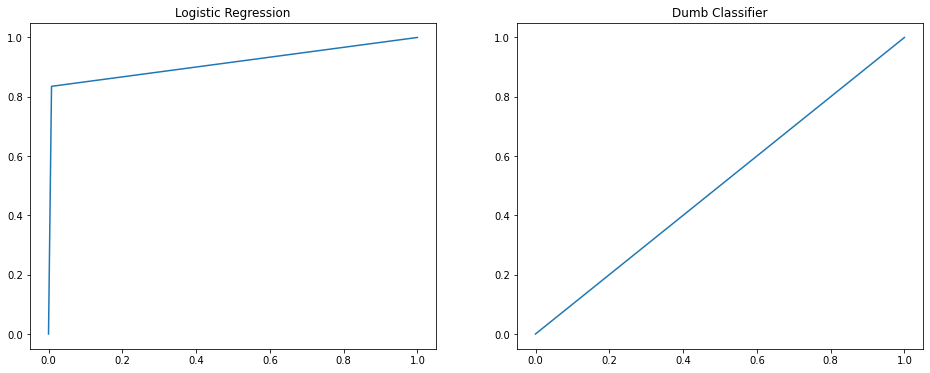

In [29]:
# your answer here
#Logistic Regression
fpr_5, tpr_5, thresholds_5 = metrics.roc_curve(y_test_5, y_pred_t)
#Dumb Classifier
fpr_n5, tpr_n5, thresholds_n5 = metrics.roc_curve(y_test_5, y_pred_n5)
f, (ax1,ax2) = plt.subplots(1,2,figsize=(16,6))

ax1.plot(fpr_5,tpr_5)
ax1.title.set_text('Logistic Regression')

ax2.plot(fpr_n5,tpr_n5)
ax2.title.set_text('Dumb Classifier')

plt.show()

#### Now let's examine the roc_curve for each. Use the roc_curve method from sklearn.metrics to help plot the curve for each.

In [30]:
# your code here
roc_auc_score(y_test_5, y_pred_t)

0.9135385341029717

#### Now find the roc_auc_score for each. 

In [32]:
# your code here
roc_auc_score(y_test_5, y_pred_n5)

0.5

#### What does this metric tell you? Which classifier works better with this metric in mind?

In [ ]:
# your answer here